<a href="https://colab.research.google.com/github/xBrymer/FreeCodeCamp-Projects/blob/master/Machine-Learning/cat-dog-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-requisites

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt



Downloading Data

In [2]:
URL = 'https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs')

70705152/70702765 [==============================] - 118s 2us/step


In [3]:

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')


In [4]:
print(os.listdir(test_dir))

['3.jpg', '23.jpg', '44.jpg', '26.jpg', '31.jpg', '21.jpg', '37.jpg', '6.jpg', '35.jpg', '24.jpg', '38.jpg', '34.jpg', '42.jpg', '14.jpg', '43.jpg', '29.jpg', '41.jpg', '45.jpg', '5.jpg', '.DS_Store', '9.jpg', '19.jpg', '32.jpg', '47.jpg', '7.jpg', '10.jpg', '27.jpg', '8.jpg', '28.jpg', '48.jpg', '49.jpg', '2.jpg', '4.jpg', '30.jpg', '36.jpg', '18.jpg', '16.jpg', '17.jpg', '13.jpg', '46.jpg', '20.jpg', '11.jpg', '33.jpg', '25.jpg', '1.jpg', '22.jpg', '15.jpg', '12.jpg', '40.jpg', '39.jpg', '50.jpg']


Get number of files in each directory. The train and validation directories each have the subdirectories "dogs" and "cats".

In [5]:
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Preprocessing the Data

Setting variables for preprocessing

In [6]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [7]:
train_image_generator = ImageDataGenerator(
    rescale = (1/255),   
)
validation_image_generator = ImageDataGenerator(
    rescale = (1/255),
)
test_image_generator = ImageDataGenerator(
    rescale = (1/255),
)

In [8]:
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    color_mode = 'rgb',
    shuffle = True,
    class_mode = 'binary'
)
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    color_mode = 'rgb',
    shuffle = True,
    class_mode = 'binary'
)
test_data_gen = test_image_generator.flow_from_directory(
    PATH,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    color_mode = 'rgb',
    shuffle = False,
    classes = ['test'],
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


Visualizing the images

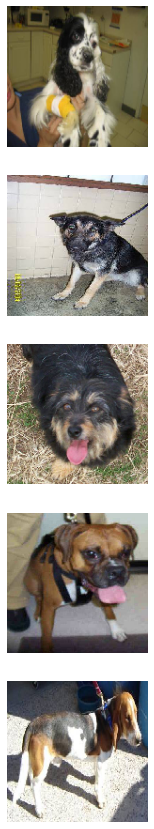

In [9]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [25]:
train_image_generator = ImageDataGenerator(
    rescale = (1/255.0),  
    shear_range = 0.025,
    horizontal_flip = True,
    zoom_range = [1.5,3.0],
    rotation_range = 20,
    vertical_flip = True,
    brightness_range = [0.5, 1.25]

)

Found 2000 images belonging to 2 classes.


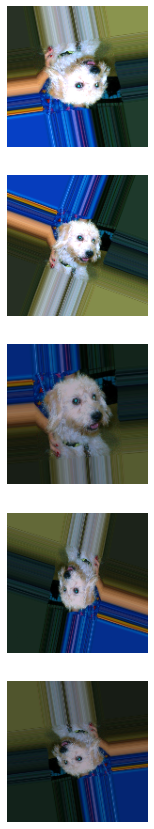

In [26]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)
    

# Training the model

Vanilla model

In [38]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, input_shape = (IMG_WIDTH, IMG_HEIGHT, 3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.10))

model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.10))

model.add(Conv2D(128, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.10))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

optimizer = tf.keras.optimizers.Adam(lr = 1e-4, decay = 1e-9 )
model.compile(optimizer = optimizer, loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 128)      

Training the model

In [39]:
history = model.fit(train_data_gen, validation_data=val_data_gen, epochs = 50)

Epoch 1/50
16/16 [==============================] - 20s 1s/step - loss: 0.7523 - accuracy: 0.4915 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 20s 1s/step - loss: 0.6957 - accuracy: 0.4835 - val_loss: 0.6930 - val_accuracy: 0.5020
Epoch 3/50
16/16 [==============================] - 20s 1s/step - loss: 0.6913 - accuracy: 0.5100 - val_loss: 0.6886 - val_accuracy: 0.5680
Epoch 4/50
16/16 [==============================] - 20s 1s/step - loss: 0.6895 - accuracy: 0.5250 - val_loss: 0.6880 - val_accuracy: 0.5630
Epoch 5/50
16/16 [==============================] - 20s 1s/step - loss: 0.6840 - accuracy: 0.5635 - val_loss: 0.6810 - val_accuracy: 0.5920
Epoch 6/50
16/16 [==============================] - 20s 1s/step - loss: 0.6770 - accuracy: 0.5675 - val_loss: 0.6758 - val_accuracy: 0.5920
Epoch 7/50
16/16 [==============================] - 20s 1s/step - loss: 0.6690 - accuracy: 0.5875 - val_loss: 0.6684 - val_accuracy: 0.6030
Epoch 8/50
16/16 [==

KeyboardInterrupt: ignored

In [61]:
!cd '/content/drive/My Drive/External Datasets/Models'

model.save('dogs-vs-cats-fcc-v1.h5')

#Evaluating the model

In [40]:
from tqdm.notebook import tqdm

Loading the model, if runtime crashes.

In [ ]:
model = tf.keras.models.load_model('dogs-vs-cats-fcc.h5')

In [ ]:
print(os.listdir(test_dir))

['3.jpg', '23.jpg', '44.jpg', '26.jpg', '31.jpg', '21.jpg', '37.jpg', '6.jpg', '35.jpg', '24.jpg', '38.jpg', '34.jpg', '42.jpg', '14.jpg', '43.jpg', '29.jpg', '41.jpg', '45.jpg', '5.jpg', '.DS_Store', '9.jpg', '19.jpg', '32.jpg', '47.jpg', '7.jpg', '10.jpg', '27.jpg', '8.jpg', '28.jpg', '48.jpg', '49.jpg', '2.jpg', '4.jpg', '30.jpg', '36.jpg', '18.jpg', '16.jpg', '17.jpg', '13.jpg', '46.jpg', '20.jpg', '11.jpg', '33.jpg', '25.jpg', '1.jpg', '22.jpg', '15.jpg', '12.jpg', '40.jpg', '39.jpg', '50.jpg']


In [43]:
def process_test_images(limit):
  test_images = []
  
  for image in tqdm(sorted(os.listdir(test_dir)[:limit])):
    if image == '.DS_Store' :
      pass
    else:
      image = tf.keras.preprocessing.image.load_img(
          f'{test_dir}/{image}',
          color_mode="rgb",
          interpolation="bilinear",
          target_size=(IMG_HEIGHT, IMG_WIDTH)
      )
      image = tf.keras.preprocessing.image.img_to_array(image)
      image = np.array([image])/255
      image.reshape(IMG_HEIGHT, IMG_WIDTH, 3)

      test_images.append(image)

 
  return test_images

In [45]:

probability_model = tf.keras.Sequential([
                                         
  model, tf.keras.layers.Softmax()                   
])


In [46]:
test_images = process_test_images(51)

In [54]:
def get_probabilites(images):
  predictions = []
  for image in images:
    img_predict = np.argmax(probability_model(image))
    if img_predict ==1:
      predictions.append(1)
    else:
      predictions.append(0)
  return predictions

    

In [55]:
show_images = np.reshape(test_images, (-1,150,150,3))

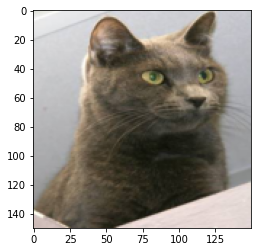

In [56]:
plt.imshow(show_images[2])

In [57]:
probabilities = get_probabilites(test_images)

In [58]:
print(probabilities)

[0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Testing the model

In [ ]:
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 
 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 
 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
 0, 1, 1, 0, 1, 0]

In [59]:

answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")


Your model correctly identified 0.66% of the images of cats and dogs.
You passed the challenge!
